# Sentence Processing for NLP

In this notebook, we will see the importance of sentence processing and the techniques that we used to train the models.


We will use a corpus of `10_000` sentences to demonstrate the difference between the different techniques.


In [1]:
from app.travel_resolver.libs.nlp.data_processing import from_bio_file_to_examples


sentences, labels, vocab, unique_labels = from_bio_file_to_examples(
    "data/bio/fr.bio/10k_samples.bio"
)

[nltk_data] Downloading package punkt_tab to /Users/az-r-
[nltk_data]     ow/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


On the same corpus, we will be comparing :

- No changes
- Stopwords removal + lowercasing
- Stopwords removal + lowercasing + stemming

To avoid confusion, variables in relation with the sentences that hasn't been altered with will be prefixed with `o` for original, `sl` for stopwords + lowercasing and `sls` for stopwords + lowercasing + stemming.

> If you're not familiar with stemming, it's basically an attempt of taking the word to it's root by removing what supposedly is a prefix or a suffix (eg: _chocolates_ $\to$ _chocolate_, _retrieval_ $\to$ _retrieve_)


In [31]:
import nltk
from app.travel_resolver.libs.nlp.data_processing import process_sentence

o_sentences = [nltk.tokenize.word_tokenize(sentence) for sentence in sentences]
sl_sentences = []
sl_labels = []
sls_sentences = []
sls_labels = []

for sentence, label in zip(sentences, labels):
    sl_sentence, sl_label = process_sentence(
        sentence, return_tokens=True, labels_to_adapt=label
    )
    sls_sentence, sls_label = process_sentence(
        sentence, stemming=True, return_tokens=True, labels_to_adapt=label
    )

    # print(len(sl_sentence))
    # print(len(sl_label))
    # break
    sl_sentences.append(sl_sentence)
    sl_labels.append(sl_label)
    sls_sentences.append(sls_sentence)
    sls_labels.append(sls_label)

In [5]:
from collections import Counter

o_word_count = Counter([word for sentence in o_sentences for word in sentence])
sl_word_count = Counter([word for sentence in sl_sentences for word in sentence])
sls_word_count = Counter([word for sentence in sls_sentences for word in sentence])

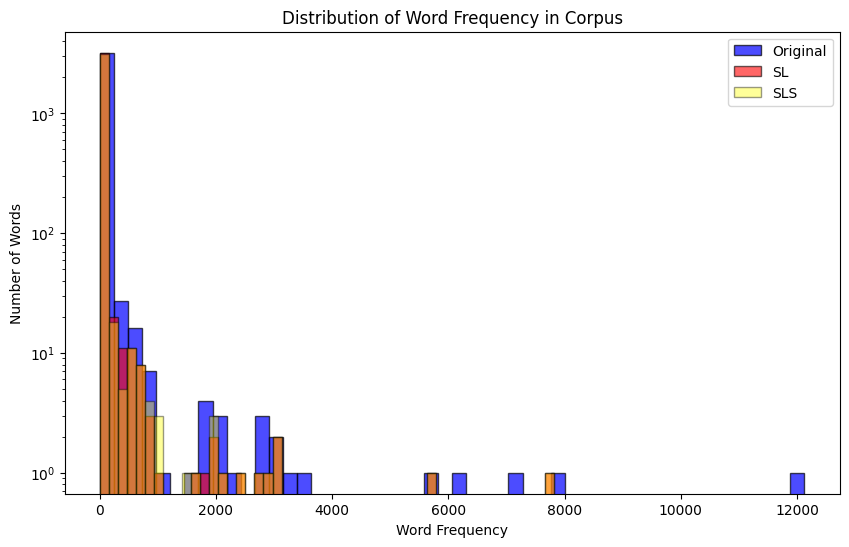

In [6]:
import matplotlib.pyplot as plt

o_word_count_values = list(o_word_count.values())
sl_word_count_values = list(sl_word_count.values())
sls_word_count_values = list(sls_word_count.values())

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(
    o_word_count_values,
    bins=50,
    color="blue",
    edgecolor="black",
    alpha=0.7,
    label="Original",
)
plt.hist(
    sl_word_count_values, bins=50, color="red", edgecolor="black", alpha=0.6, label="SL"
)
plt.hist(
    sls_word_count_values,
    bins=50,
    color="yellow",
    edgecolor="black",
    alpha=0.4,
    label="SLS",
)
plt.yscale("log")  # Optional: use log scale for y-axis if the distribution is skewed
plt.xlabel("Word Frequency")
plt.ylabel("Number of Words")
plt.title("Distribution of Word Frequency in Corpus")
plt.legend()
plt.show()

In [7]:
import numpy as np
from tabulate import tabulate

word_distributions = np.array(
    [
        ["", "max", "mean", "std", "n_words", "avg_tokens/sentence"],
        [
            "Original",
            np.max(o_word_count_values),
            np.mean(o_word_count_values),
            np.std(o_word_count_values),
            len(o_word_count),
            np.mean([len(sentence) for sentence in o_sentences]),
        ],
        [
            "SL",
            np.max(sl_word_count_values),
            np.mean(sl_word_count_values),
            np.std(sl_word_count_values),
            len(sl_word_count),
            np.mean([len(sentence) for sentence in sl_sentences]),
        ],
        [
            "SLS",
            np.max(sls_word_count_values),
            np.mean(sls_word_count_values),
            np.std(sls_word_count_values),
            len(sls_word_count),
            np.mean([len(sentence) for sentence in sls_sentences]),
        ],
    ]
)

print(tabulate(word_distributions, headers="firstrow", tablefmt="fancy_grid"))

╒══════════╤═══════╤═════════╤═════════╤═══════════╤═══════════════════════╕
│          │   max │    mean │     std │   n_words │   avg_tokens/sentence │
╞══════════╪═══════╪═════════╪═════════╪═══════════╪═══════════════════════╡
│ Original │ 12127 │ 41.3419 │ 367.982 │      3270 │              13.61    │
├──────────┼───────┼─────────┼─────────┼───────────┼───────────────────────┤
│ SL       │  7825 │ 27.8919 │ 224.392 │      3248 │               9.12041 │
├──────────┼───────┼─────────┼─────────┼───────────┼───────────────────────┤
│ SLS      │  7825 │ 28.2397 │ 229.139 │      3208 │               9.12041 │
╘══════════╧═══════╧═════════╧═════════╧═══════════╧═══════════════════════╛


With the processing techniques, we were able to reduce :

- Mean
- Standard Deviation (`std`)
- Number of words (`n_words`)
- Average Tokens per sentence (`avg_tokens/sentence`)


In [38]:
o_label_count = Counter(sum(labels, []))
sl_label_count = Counter(sum(sl_labels, []))
sls_label_count = Counter(sum(sls_labels, []))

In [39]:
o_label_count, sl_label_count, sls_label_count

(Counter({0: 113556, 1: 10836, 2: 10796}),
 Counter({0: 68961, 1: 10836, 2: 10796}),
 Counter({0: 68961, 1: 10836, 2: 10796}))

Both **SL** and **SLS** have the same ratio for each of the labels therefore we will be comparing either one of them with the **O** corpus.


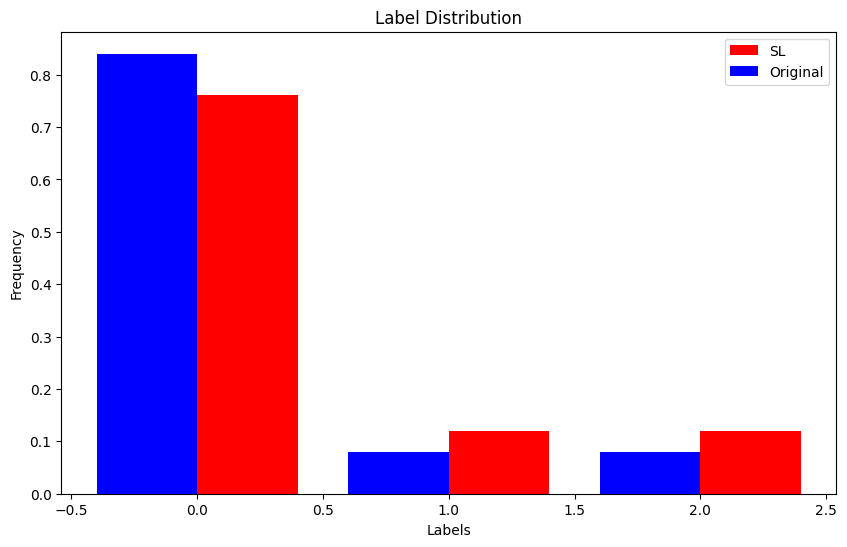

In [ ]:
o_label_ratio = [c / sum(o_label_count.values()) for c in o_label_count.values()]
sl_label_ratio = [c / sum(sl_label_count.values()) for c in sl_label_count.values()]

x = np.arange(len(unique_labels))
bar_width = 0.4

o_label_x = [i - (bar_width / 2) for i in o_label_count.keys()]
sl_label_x = [i + (bar_width / 2) for i in sl_label_count.keys()]

fig = plt.figure(figsize=(10, 6))

# Creating a bar plot
plt.bar(sl_label_x, sl_label_ratio, color="red", width=0.4, label="SL")
plt.bar(o_label_x, o_label_ratio, color="blue", width=0.4, label="Original")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.title("Label Distribution")
plt.legend()
plt.show()

Processing the sentences helped used increase the amount of classes representation as well as decrease the ratio of "Outside" words whilst keeping the "Normal" representation.
